In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot   as plt 
from sklearn    import datasets as dt 
from sklearn    import cluster  as c
from sklearn    import metrics  as mt
from IPython import display


In [2]:
dataset_path = r"C:\Users\muzio\OneDrive\Documentos\repos\machine_learning\Clustering\X_dataset.csv"

X = pd.read_csv (dataset_path)



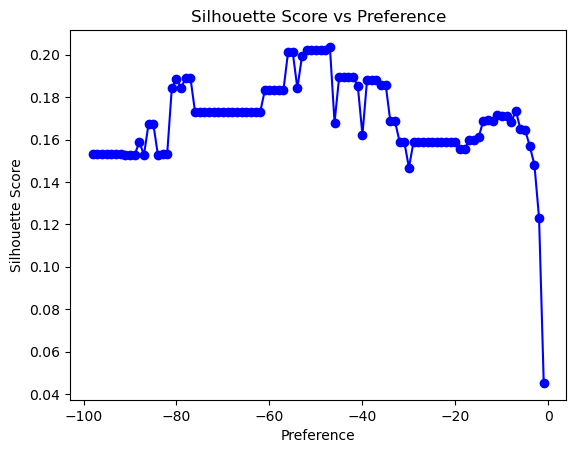

Best preference: - 46
Number of clusters: 4
Silhoutte Score: 0.20365750456597356


<Figure size 640x480 with 0 Axes>

In [30]:
# testing parameter 
p = np.arange( -1, -100, -1 ) 
ss_list = []

fig = plt.figure()
for i in range ( len( p )):
    #model definition
    model = c.AffinityPropagation(     
        copy=True,                
        damping=0.5, 
        max_iter=200, 
        convergence_iter=15, 
        preference= p[i] 
        )

    #model training
    model.fit(X)

    #model fit
    labels = model.predict (X)
    
    # calculate silhouette score
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)
    
plt.title('Silhouette Score vs Preference')
plt.plot(p[:i], ss_list[:i], marker='o', color='blue')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
   
display.clear_output(wait=True)
plt.pause(0.01)
plt.show()
plt.gcf()

p_best = ss_list.index(max(ss_list))
print('Best preference: -', p_best)
print('Number of clusters:', len(np.unique(labels)))
print('Silhoutte Score:', np.max(ss_list))